# Import Libraries 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [2]:
df = pd.read_csv('CC GENERAL.csv')

## Display Dataset Info

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8950   │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 18     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA   ┃ NA %  ┃ mean  ┃ sd    ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ BALANCE                 │    0 │     0 │  1600 │  2100 │      0 │    130 │    870 │  2100 │ 19000 │   ▇▁   │  │
│ │ BALANCE_FREQUENCY       │    0 │     0 │  0.88 │  0.24 │      0 │   0.89 │      1 │     1 │     1 │    ▁▁▇ │  │
│ │ PURCHASES               │    0 │     0 │  1000 │  2100 │      0 │     40 │    360 │  1100 │ 49000 │   ▇    │  │
│ │ ONEOFF_PURCHASES        │    0 │     0 │   590 │  1700 │      0 │      0 │     38 │   580 │ 41000 │   ▇    │  │
│ │ INSTALLMENTS_PURCHASES  │    0 │     0 │   410 │   900 │      0 │      0 │     89 │   470 │ 22000 │   ▇    │  │
│ │ CASH_ADVANCE            │    0 │     0 │   980 │  2100 │      0 │      0 │      0 │  1100 │ 47000 │   ▇    │  │
│ │ PURCHASES_FREQUENCY     │    0 │     0 │  0.49 │   0.4 │      0 │  0.083 │    0.5 │  0.92 │     1 │ ▇▃▁▂▃▇ │  │
│ │ ONEOFF_PURCHASES_FREQUE │    0 │     0 │   0.2 │   0.3 │      0 │      0 │  0.083 │   0.3 │     1 │ ▇▂ ▁▁▁ │  │
│ │ NCY                     │      │       │       │       │        │        │        │       │       │        │  │
│ │ PURCHASES_INSTALLMENTS_ │    0 │     0 │  0.36 │   0.4 │      0 │      0 │   0.17 │  0.75 │     1 │ ▇▂▁▁▂▃ │  │
│ │ FREQUENCY               │      │       │       │       │        │        │        │       │       │        │  │
│ │ CASH_ADVANCE_FREQUENCY  │    0 │     0 │  0.14 │   0.2 │      0 │      0 │      0 │  0.22 │   1.5 │  ▇▂▁   │  │
│ │ CASH_ADVANCE_TRX        │    0 │     0 │   3.2 │   6.8 │      0 │      0 │      0 │     4 │   120 │   ▇    │  │
│ │ PURCHASES_TRX           │    0 │     0 │    15 │    25 │      0 │      1 │      7 │    17 │   360 │   ▇    │  │
│ │ CREDIT_LIMIT            │    1 │  0.01 │  4500 │  3600 │     50 │   1600 │   3000 │  6500 │ 30000 │  ▇▃▁   │  │
│ │ PAYMENTS                │    0 │     0 │  1700 │  2900 │      0 │    380 │    860 │  1900 │ 51000 │   ▇    │  │
│ │ MINIMUM_PAYMENTS        │  313 │   3.5 │   860 │  2400 │  0.019 │    170 │    310 │   830 │ 76000 │   ▇    │  │
│ │ PRC_FULL_PAYMENT        │    0 │     0 │  0.15 │  0.29 │      0 │      0 │      0 │  0.14 │     1 │ ▇▁   ▁ │  │
│ │ TENURE                  │    0 │     0 │    12 │   1.3 │      6 │     12 │     12 │    12 │    12 │      ▇ │  │
│ └─────────────────────────┴──────┴───────┴───────┴───────┴────────┴────────┴────────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Data Preprocessing 

#### Removing CUST_ID column

In [7]:
df.drop(columns=['CUST_ID'], inplace=True)

## Dealing with missing Values

#### Handling MINIMUM_PAYMENTS Column

In [8]:
#Rows where payments = 0 and min payments is null which means no payments were made 
print('No payments: ',\
    df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)

No payments:  (2365, 2)


In [9]:
mean_minimum_payments = df['MINIMUM_PAYMENTS'].mean()
#  Replace NA values in 'MINIMUM_PAYMENTS' (0 if payments = 0 otherwise mean imputation)
df['MINIMUM_PAYMENTS'] = df.apply(
    lambda row: 0 if row['PAYMENTS'] == 0 and pd.isna(row['MINIMUM_PAYMENTS']) 
    else (mean_minimum_payments if pd.isna(row['MINIMUM_PAYMENTS']) else row['MINIMUM_PAYMENTS']),
    axis=1
)

In [10]:
df['MINIMUM_PAYMENTS'].isnull().sum()

0

#### Handling CREDIT_LIMIT Column

In [11]:
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [12]:
df = df.drop(index=5203).reset_index(drop=True)

## Handling Outliers

#### Visualizing outliers using Box plots

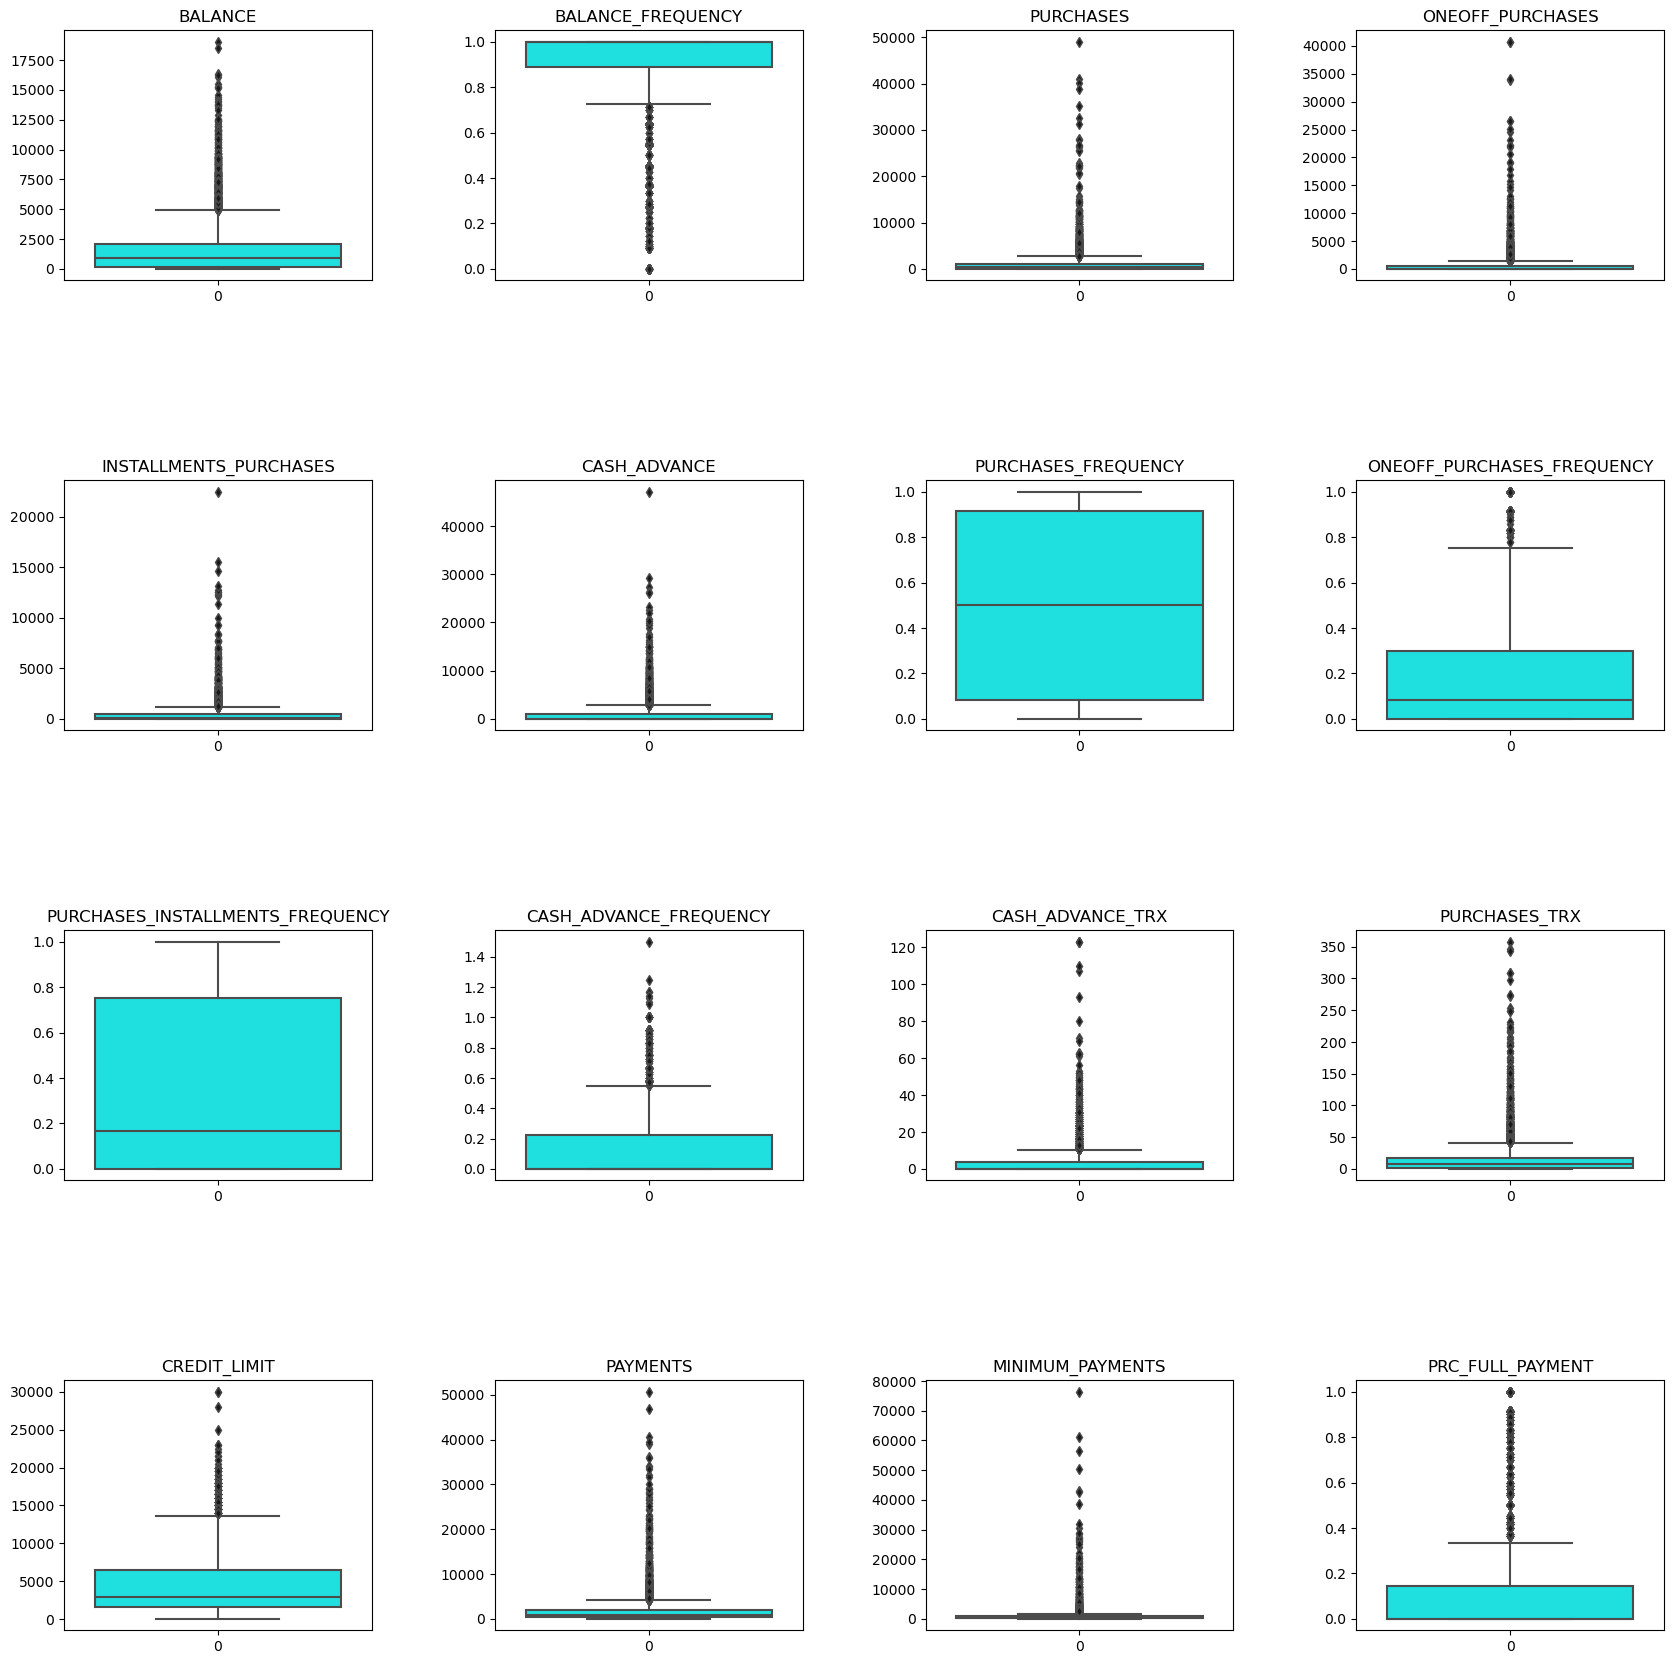

In [13]:
columns = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):
    
    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]], color='aqua',flierprops = dict(markerfacecolor = '0.10', markersize = 5))
    plt.title(columns[i], fontsize=12)
    plt.xlabel("")
    
plt.show()

#### finding outliers using IQR

In [14]:
outlier_counts = {}


for col in df.select_dtypes(include=['float64', 'int64']).columns:  # Only numeric columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

 
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = outlier_count


for col, count in outlier_counts.items():
    print(f"{col}: {count} ")

BALANCE: 695 
BALANCE_FREQUENCY: 1492 
PURCHASES: 808 
ONEOFF_PURCHASES: 1013 
INSTALLMENTS_PURCHASES: 867 
CASH_ADVANCE: 1030 
PURCHASES_FREQUENCY: 0 
ONEOFF_PURCHASES_FREQUENCY: 782 
PURCHASES_INSTALLMENTS_FREQUENCY: 0 
CASH_ADVANCE_FREQUENCY: 525 
CASH_ADVANCE_TRX: 804 
PURCHASES_TRX: 766 
CREDIT_LIMIT: 248 
PAYMENTS: 808 
MINIMUM_PAYMENTS: 846 
PRC_FULL_PAYMENT: 1474 
TENURE: 1365 


#### Droping outliers using z-score

In [15]:
from scipy.stats import zscore
import numpy as np

# Compute Z-Scores
z_scores = np.abs(zscore(df))

# Identify rows where any column's Z-Score is greater than 3
outliers_zscore = (z_scores > 3).any(axis=1)

# Remove outliers
df = df[~outliers_zscore]



## Feature Scaling

In [16]:
scaler = StandardScaler()
df_Standardize = df.copy()
df_Standardize[df_Standardize.columns] = scaler.fit_transform(df_Standardize[df_Standardize.columns])
df_Standardize.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.556600,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.640569,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.069397,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,-0.735643,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.421484,-0.531523,0.312187


## Kmeans Clustering 

####  Finding the optimal number of clusters using the elbow method

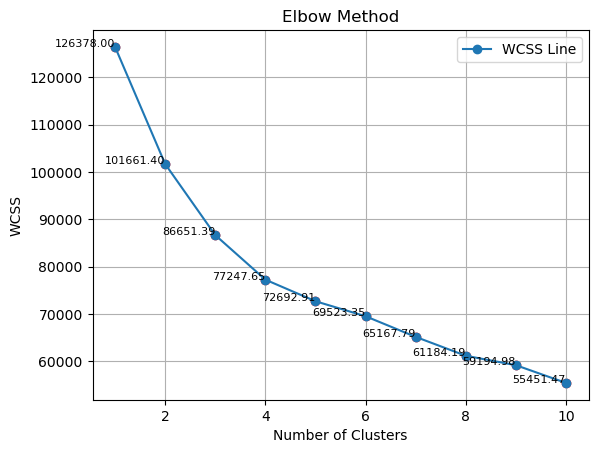

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_Standardize)
    wcss.append(kmeans.inertia_)

# Plot the elbow method line
plt.plot(range(1, 11), wcss, marker='o', label="WCSS Line")

# Add points on the line
for i, value in enumerate(wcss, start=1):
    plt.scatter(i, value, color='red')  # Red points on the curve
    plt.text(i, value, f'{value:.2f}', fontsize=8, ha='right')  # Add text for WCSS values

# Add labels, title, and legend
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.legend()
plt.grid(True)
plt.show()

#### Use K-Means with Optimal Clusters

In [18]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(df_Standardize)

#### Visualize the Clusters

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_20036\2946802974.py:41: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles=[cluster_legend1, cluster_legend2, cluster_legend3, centroids], loc='best')


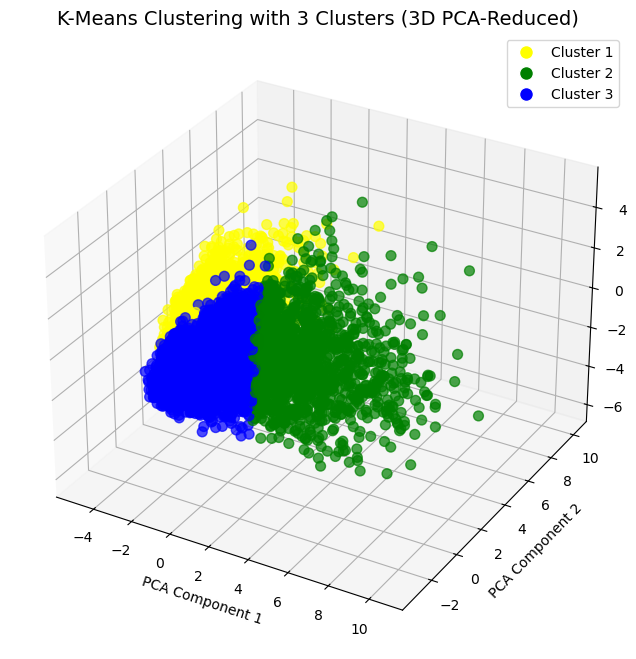

In [19]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(df_Standardize)

# Define custom colors for the clusters
custom_colors = ['yellow', 'green', 'blue']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points with 3 clusters, using custom colors
scatter = ax.scatter(
    reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
    c=y_kmeans, cmap=plt.cm.colors.ListedColormap(custom_colors), s=50, alpha=0.7
)

# Scatter plot for the centroids
centroids = ax.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
    s=200, c='red', marker=''
)

# Add labels and title
ax.set_title("K-Means Clustering with 3 Clusters (3D PCA-Reduced)", fontsize=14)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

# Manually create legend for each cluster with distinct colors
cluster_legend1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Cluster 1')
cluster_legend2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 2')
cluster_legend3 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 3')

# Add the custom legend entries for clusters and centroids
ax.legend(handles=[cluster_legend1, cluster_legend2, cluster_legend3, centroids], loc='best')

plt.show()
